# LGMVIP Task-1: Iris Flower Classification

done by vaibhav patel 

# Importing the required libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves as ac
from sklearn.model_selection import train_test_split as ts
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from warnings import filterwarnings
filterwarnings(action='ignore')






# Loading Data Set

In [74]:
iris="iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class']
df= pd.read_csv(iris, names=names)
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Summarization

In [75]:
df.shape

(150, 5)

In [76]:
df.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [77]:
df.tail(20)

,sepal-length,sepal-width,petal-length,petal-width,class
130,7.4,2.8,6.1,1.9,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica


In [78]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [80]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Data Visualization

# Pie chart

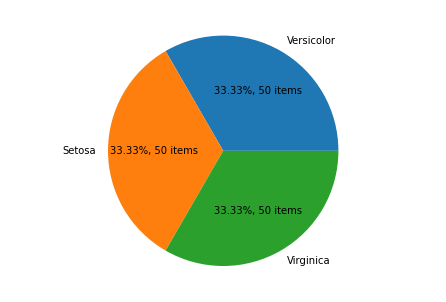

In [81]:
fig=plt.figure()
ax =fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Versicolor', 'Setosa', 'Virginica']
size = [50,50,50]
ax.pie(size, labels=labels,autopct=lambda p:f'{p:.2f}%, {p*sum(size)/100 :.0f} items')
plt.show()

# Histogram

In [1]:
df.pie()
plt.show()

NameError: name 'df' is not defined

# Boxplot or Whisker plot

<function matplotlib.pyplot.show(close=None, block=None)>

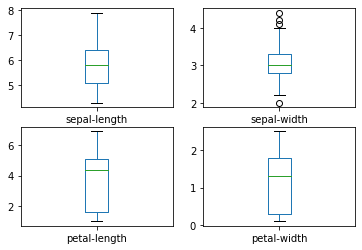

In [83]:
df.plot.box(subplots=True, layout=(2,2))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

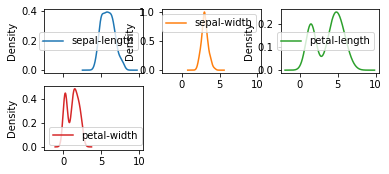

In [84]:
df.plot.density(subplots = True, layout=(3,3))
plt.show


# Area plot

Text(0.5, 1.0, 'General Statistics of Iris Dataset')

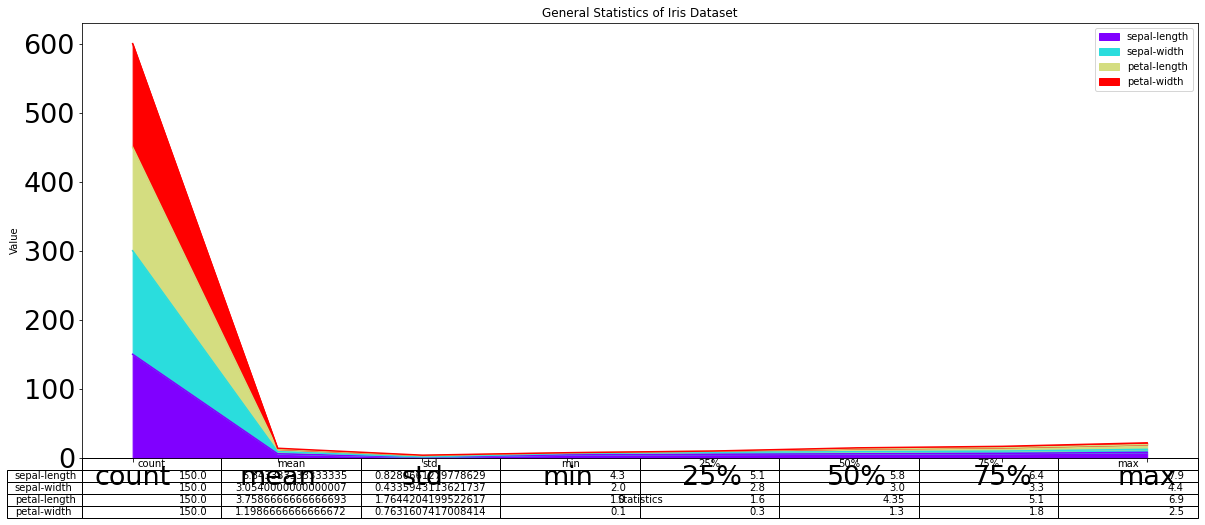

In [85]:
df.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")

# Violin plot

<AxesSubplot:xlabel='class', ylabel='sepal-width'>

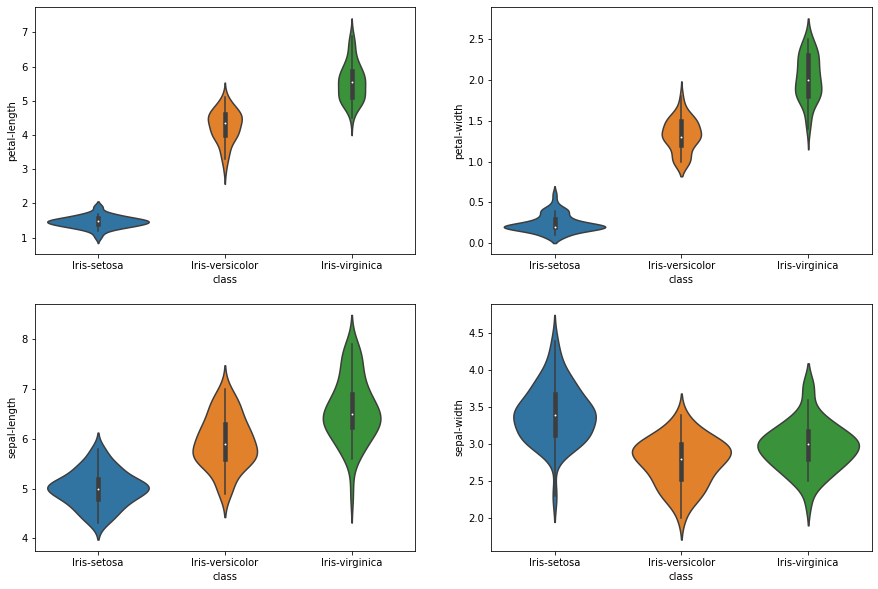

In [86]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petal-length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petal-width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepal-length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepal-width',data=df)


# Pair plot

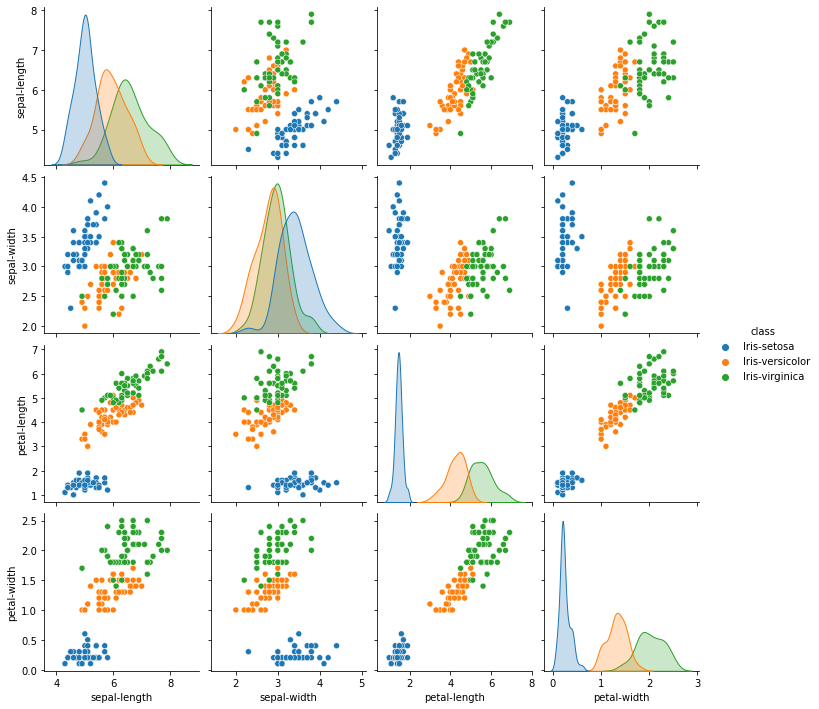

In [87]:
sns.pairplot(df,hue='class');

# Scatter Plot Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

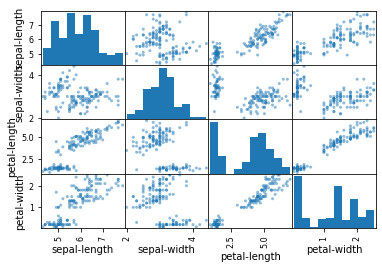

In [88]:
from pandas.plotting import scatter_matrix as sn
sn(df)
plt.show


# Heat Map

<AxesSubplot:>

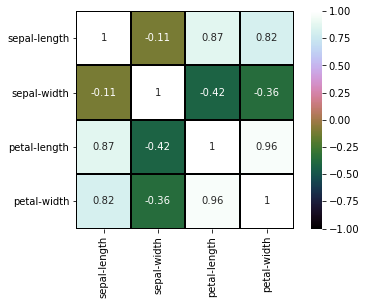

In [89]:

sns.heatmap(df.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

# Strip Plot

<AxesSubplot:xlabel='class', ylabel='sepal-length'>

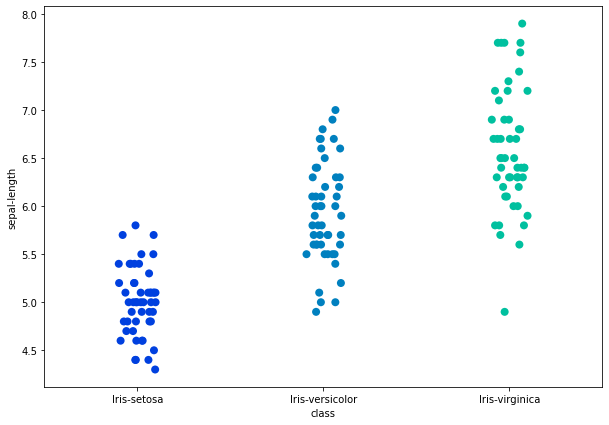

In [90]:
fig=plt.gcf()
fig.set_size_inches(10,7)
sns.stripplot(x='class',y='sepal-length',data=df,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

# Andrews Curve

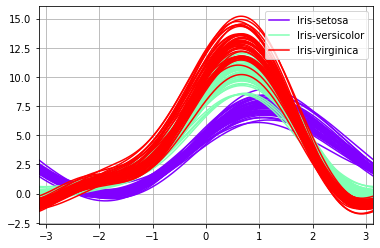

In [91]:
ac(df,"class",colormap='rainbow')
plt.show()
plt.ioff()

# Residual Plot

<AxesSubplot:xlabel='sepal-length', ylabel='sepal-width'>

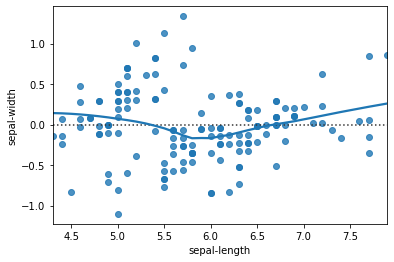

In [92]:
sns.residplot('sepal-length', 'sepal-width',data=df,lowess=True)

# Train-Test splitting dataset

In [127]:
array = df.values
x =array[:,0:4]
y =array[:,4]
x_train,x_test,y_train,y_test = ts(x,y,test_size=0.20,random_state=1)

# Checking Algorithms

In [128]:
models =[]
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr' )))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))



In [129]:
results =[]
names =[]
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model,x_train,y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


# Performance Comparison

<function matplotlib.pyplot.show(close=None, block=None)>

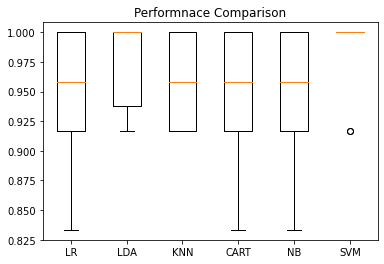

In [131]:
plt.boxplot(results,labels=names)
plt.title('Performnace Comparison')
plt.show

# Making predictions on Train-Test Split dataset

In [132]:
model = SVC(gamma='auto')
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [133]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Thank You!!!